# Import and init

In [99]:
import os 
import json

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
INPUT_DATA_URL = 'https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv'
INPUT_DATA_RELPATH = 'data/input/tmdb_5000_movies.csv'


In [101]:
def download_file(url: str, 
                  filename: str
                  ) -> None:
    """
    Downloads a file from a given URL using the requests module.

    Args:
        url (str): The URL of the file to download.
        filename (str): The local path and name to save the file as.
    """
    try:
        # Send a GET request to the URL
        response = requests.get(url, stream=True)
        response.raise_for_status() # Raise an exception for bad status codes (4XX or 5XX)

        # Open the file in binary write mode and write the content
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                # If you want a progress bar, you'd add logic here
                f.write(chunk)
        print(f"File '{filename}' downloaded successfully.")

    except requests.exceptions.RequestException as e:
        print(f"Download failed: {e}")

# Data

## Download dataset

In [102]:
input_data_relpath_directory = os.path.split(INPUT_DATA_RELPATH)[0]
if input_data_relpath_directory and not os.path.exists(input_data_relpath_directory):
    print(f'Creating directory: {input_data_relpath_directory}')
    os.makedirs(input_data_relpath_directory)

In [103]:
download_file(
    INPUT_DATA_URL, 
    INPUT_DATA_RELPATH
)

File 'data/input/tmdb_5000_movies.csv' downloaded successfully.


## Read data

In [104]:
df0 = pd.read_csv(INPUT_DATA_RELPATH)
df0

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

## EDA

### Overall

In [105]:
print(f"""- Number of rows: {len(df0)}
""")

- Number of rows: 4803



In [106]:
df0.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

All columns:
- budget                int64
- genres                str
- homepage              str
- id                    int64
- keywords              str
- original_language     str
- original_title        str
- overview              str
- popularity            float64
- production_companies  str
- production_countries  str
- release_date          str
- revenue               int64
- runtime               float64
- spoken_languages      str
- status                str
- tagline               str
- title                 str
- vote_average          float64
- vote_count            int64


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

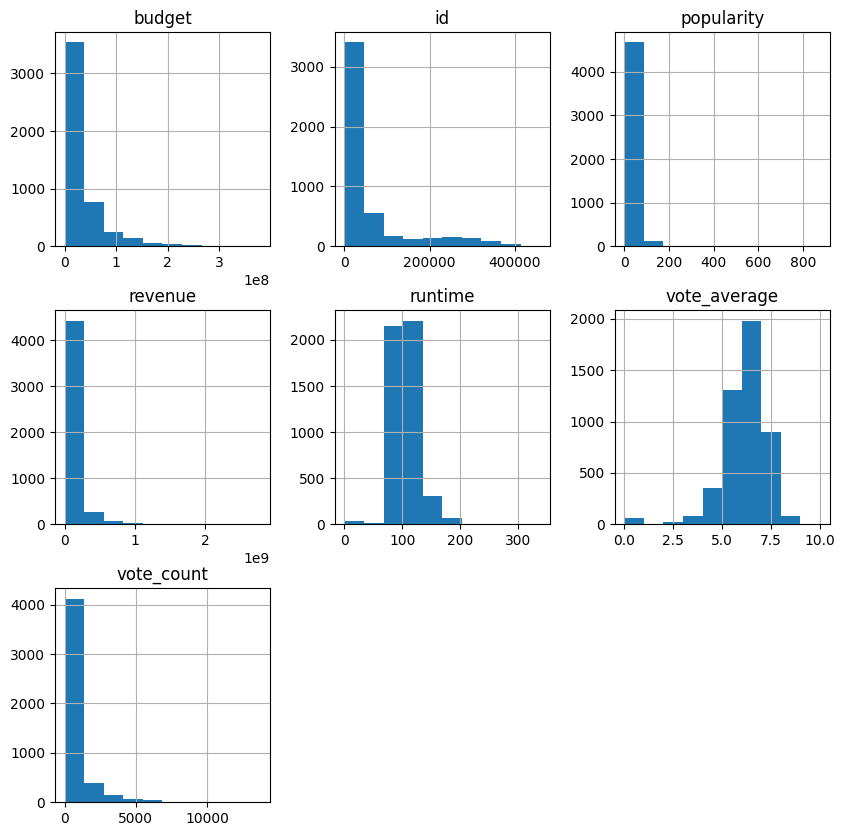

In [107]:
def EDA_plots(df):
    # Print all columns
    print(f"All columns:")
    max_len = max(len(i) for i in list(df.columns))
    for i in list(df.columns):
        how_many_spaces = max_len - len(i)
        print(f"- {i}{' '*how_many_spaces}  {df[i].dtypes}")
    # Make histograms for numeric variables
    display(df.hist(figsize=(10, 10)));
    # Plot categorical values
    for i in list(df.select_dtypes(include = 'category').columns.tolist()):
        plt.figure(
            figsize=(5, 5)
        );
        df[[i]].value_counts().plot(kind = 'barh');
        plt.show();
    return None

EDA_plots(df0)

### overview

<Axes: ylabel='Count'>

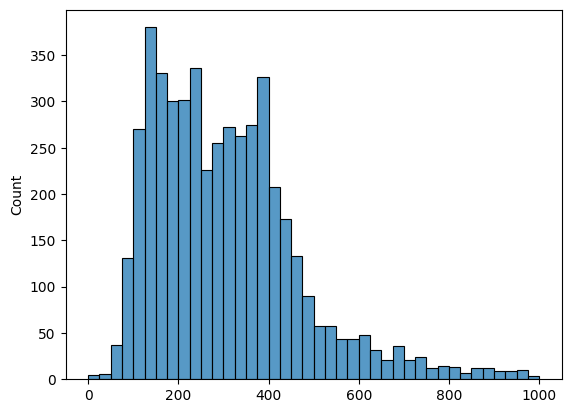

In [108]:
def proc1(x):
    if not pd.isnull(x):
        return len(x)
    return 0

sns.histplot(
    df0['overview'].apply(lambda x: proc1(x)).tolist()
)


### json fields

In [109]:
# some fields are formatted in what looks like 
# json-formatted values with multiple values per row
json_fields = ['genres', 'keywords', 'spoken_languages']
df0[json_fields].head(3)

,genres,keywords,spoken_languages
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."


In [110]:
for i in json_fields:
    print(f'Field "{i}"')
    print('- Json-loaded string:')
    json_proc1 = json.loads(
        df0[i][0]
    )
    print(json_proc1)
    print(f'- Unique keys present: {set([item for sublist in json_proc1 for item in sublist])}')
    print('- Only getting values for the key "name":')
    print([i['name'] for i in json_proc1], '\n')


Field "genres"
- Json-loaded string:
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]
- Unique keys present: {'name', 'id'}
- Only getting values for the key "name":
['Action', 'Adventure', 'Fantasy', 'Science Fiction'] 

Field "keywords"
- Json-loaded string:
[{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}, {'id': 3801, 'name': 'space travel'}, {'id': 9685, 'name': 'futuristic'}, {'id': 9840, 'name': 'romance'}, {'id': 9882, 'name': 'space'}, {'id': 9951, 'name': 'alien'}, {'id': 10148, 'name': 'tribe'}, {'id': 10158, 'name': 'alien planet'}, {'id': 10987, 'name': 'cgi'}, {'id': 11399, 'name': 'marine'}, {'id': 13065, 'name': 'soldier'}, {'id': 14643, 'name': 'battle'}, {'id': 14720, 'name': 'love affair'}, {'id': 165431, 'name': 'anti war'}, {'id': 193554, 'name': 'power r

### status

In [111]:
df0['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

### original title, title

As we can see below, `title` is the English-translated version of the column `original_title`. Therefore, let's use `title` as the feature.

In [112]:
n_total_rows = len(df0)
rows_diff = (
    df0[
        df0['original_title'] != df0['title']
    ]
    [['original_title', 'title']]
)
n_rows_diff = len(rows_diff)

print(f'Rows where "original_title" = "title": {total_rows - n_rows_diff}')
print(f'Rows where they are different: {n_rows_diff}')

rows_diff[['original_title', 'title']]


Rows where "original_title" = "title": 4542
Rows where they are different: 261


,original_title,title
97,シン・ゴジラ,Shin Godzilla
215,4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer
235,Astérix aux Jeux Olympiques,Asterix at the Olympic Games
317,金陵十三釵,The Flowers of War
474,Évolution,Evolution
...,...,...
4699,Lumea e a mea,The World Is Mine
4719,Une femme mariée: Suite de fragments d'un film...,The Married Woman
4751,"Gabriela, Cravo e Canela",Gabriela
4790,دایره,The Circle


### features

In [113]:
# This is how I distribute the columns to either
# potentially be used as features, or completely irrelevant:

potentially_relevant_features = [
    # primary textual features
    'overview',

    # secondary textual features
    'original_title', 'tagline', 'title',

    # json-formatted text
    'genres', 
    'keywords', 
    'production_companies', 
    'production_countries',
    'spoken_languages',

    # numeric features
    'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count',

    # datetime
    'release_date',
]

unnecessary_features = [
    'homepage',
    'id',
    'status', # it's a boolean variable, could be useful for only using movies that are "Released"
    'original_language', # untranslated title
]


In [114]:
all_columns = df0.columns.tolist()
assigned_columns = unnecessary_features + potentially_relevant_features

# check if you assigned all the columns as features
diff1 = set(all_columns).difference(set(assigned_columns))
assert diff1 == set(), \
    f"Warning: choose what to do with the following unused columns:\n{diff1}"

# check if you didn't assign any columns that are not present in the dataframe
diff2 = set(assigned_columns).difference(set(all_columns))
assert diff2 == set(), \
    f"Warning: you assigned column(s) that are not present in the dataframe:\n{diff2}"
